In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# Data cleaning & getting rid of irrelevant information before clustering

In [3]:
house_data=pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")


In [4]:
house_data.head()

Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000

In [5]:
df=pd.DataFrame(data=house_data)

In [6]:
df.head()

Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000

Renaming 'Living.Room' column as 'LivingRoom'

In [7]:
df.rename(columns = {'Living.Room':'LivingRoom'}, inplace = True)

In [8]:
df=df.drop(df.columns[[0]],axis = 1)

In [9]:
df.head()

Sqft  Floor  TotalFloor  Bedroom  LivingRoom  Bathroom  Price
0  1177.698      2           7        2           2         2  62000
1  2134.800      5           7        4           2         2  78000
2  1138.560      5           7        2           2         1  58000
3  1458.780      2           7        3           2         2  45000
4   967.776     11          14        3           2         2  45000

In [10]:
X=df.drop(df.columns[[6]],axis = 1)
Y=df['Price']

In [11]:
X.head()

Sqft  Floor  TotalFloor  Bedroom  LivingRoom  Bathroom
0  1177.698      2           7        2           2         2
1  2134.800      5           7        4           2         2
2  1138.560      5           7        2           2         1
3  1458.780      2           7        3           2         2
4   967.776     11          14        3           2         2

In [12]:
Y.head()

0    62000
1    78000
2    58000
3    45000
4    45000
Name: Price, dtype: int64

In [13]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(X)

In [14]:
x_reduced[:3]

array([[-349.96828536,   -4.68248886],
       [ 607.13482659,   -4.96758149],
       [-389.10464917,   -2.90340776]])

In [15]:
pd.DataFrame(x_reduced)

0         1
0    -349.968285 -4.682489
1     607.134827 -4.967581
2    -389.104649 -2.903408
3     -68.886263 -5.272438
4    -559.868480  6.573324
..           ...       ...
640  -168.490496  4.351670
641 -1150.510376  0.578561
642  -787.580936  8.223959
643   180.187642  0.565680
644  -150.717782 -2.842999

[645 rows x 2 columns]

In [16]:
col_1 = x_reduced[:, 0]
col_2 = x_reduced[:, 1]

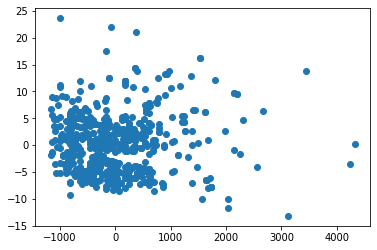

In [17]:
plt.scatter(col_1,col_2)

Using scatter plot we assume the value of k=4

In [18]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(X)
y_predicted

array([3, 1, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 0, 2, 3, 1, 2,
       0, 3, 2, 1, 2, 2, 0, 0, 1, 3, 1, 3, 0, 0, 0, 0, 2, 0, 2, 0, 3, 3,
       1, 3, 3, 1, 2, 0, 1, 3, 0, 0, 2, 1, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0,
       3, 0, 0, 3, 0, 3, 1, 0, 0, 1, 1, 3, 3, 0, 3, 0, 0, 0, 3, 3, 2, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1,
       1, 0, 1, 1, 3, 3, 2, 0, 0, 0, 0, 3, 1, 1, 1, 3, 3, 1, 3, 0, 3, 3,
       1, 3, 3, 1, 0, 1, 1, 3, 2, 3, 3, 3, 3, 0, 1, 2, 3, 1, 1, 1, 1, 0,
       0, 3, 0, 1, 3, 3, 3, 0, 0, 2, 3, 1, 1, 1, 3, 3, 1, 1, 1, 2, 0, 1,
       1, 3, 3, 3, 1, 0, 2, 3, 3, 3, 3, 3, 3, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 3, 3, 3, 3, 0, 3, 1, 0, 0, 3, 3, 3, 0, 1, 0, 3, 1, 3, 1, 0, 1,
       3, 1, 2, 0, 1, 0, 0, 0, 1, 1, 3, 3, 1, 1, 1, 0, 3, 3, 0, 1, 0, 3,
       2, 1, 1, 3, 1, 0, 2, 1, 3, 2, 1, 1, 1, 0, 0, 3, 2, 3, 0, 0, 3, 1,
       3, 3, 0, 0, 3, 3, 3, 1, 0, 0, 3, 3, 3, 1, 3, 0, 0, 1, 3, 3, 1, 3,
       2, 1, 0, 1, 3, 0, 1, 3, 1, 3, 2, 2, 2, 2, 1,

In [19]:
X['cluster']=y_predicted
X

Sqft  Floor  TotalFloor  Bedroom  LivingRoom  Bathroom  cluster
0    1177.698      2           7        2           2         2        3
1    2134.800      5           7        4           2         2        1
2    1138.560      5           7        2           2         1        3
3    1458.780      2           7        3           2         2        3
4     967.776     11          14        3           2         2        0
..        ...    ...         ...      ...         ...       ...      ...
640  1359.156      7          15        3           2         2        3
641   377.148      4          10        1           1         1        0
642   740.064     13          14        1           1         1        0
643  1707.840      3          14        3           2         2        1
644  1376.946      6           7        3           2         1        3

[645 rows x 7 columns]

In [20]:
km.cluster_centers_

array([[7.42175341e+02, 5.95604396e+00, 9.97802198e+00, 1.80219780e+00,
        1.42857143e+00, 1.13736264e+00],
       [2.01111168e+03, 6.28494624e+00, 1.22688172e+01, 3.50000000e+00,
        1.98924731e+00, 2.11827957e+00],
       [3.37832100e+03, 8.24000000e+00, 1.51400000e+01, 3.66000000e+00,
        2.10000000e+00, 2.90000000e+00],
       [1.35365442e+03, 5.13656388e+00, 9.45814978e+00, 2.94273128e+00,
        1.91629956e+00, 1.85903084e+00]])

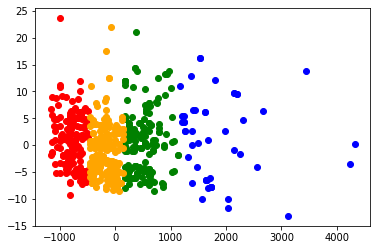

In [21]:
plt.scatter(col_1[np.argwhere(y_predicted==0)], col_2[np.argwhere(y_predicted==0)], color = 'red')
plt.scatter(col_1[np.argwhere(y_predicted==1)], col_2[np.argwhere(y_predicted==1)], color = 'green')
plt.scatter(col_1[np.argwhere(y_predicted==2)], col_2[np.argwhere(y_predicted==2)], color = 'blue')
plt.scatter(col_1[np.argwhere(y_predicted==3)], col_2[np.argwhere(y_predicted==3)], color = 'orange')

# Elbow method to get K value

In [22]:
SSE = []    #SSE-Sum of squared errors
k_rng = range(1,10)
for k in k_rng:
  model = KMeans(n_clusters = k)
  model.fit(X)
  SSE.append(model.inertia_)

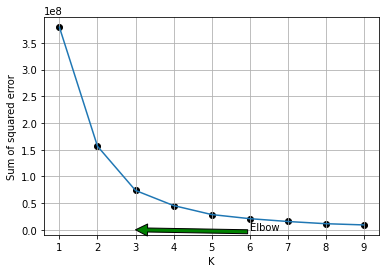

In [35]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.annotate('Elbow', xytext=(6,200), xy=(3,79), arrowprops={'facecolor':'green'})
plt.plot(k_rng,SSE)
plt.scatter(k_rng, SSE, color = 'black')
plt.grid() 
plt.show()

# Storing cluster to which the house belongs along with the data

In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(X)
X['cluster']=y_predicted

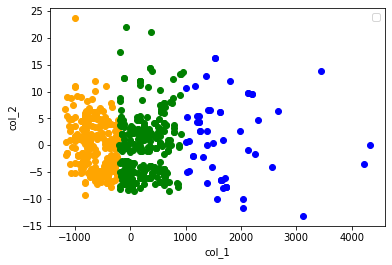

In [34]:
plt.scatter(col_1[np.argwhere(y_predicted==0)], col_2[np.argwhere(y_predicted==0)], color = 'orange')
plt.scatter(col_1[np.argwhere(y_predicted==1)], col_2[np.argwhere(y_predicted==1)], color = 'green')
plt.scatter(col_1[np.argwhere(y_predicted==2)], col_2[np.argwhere(y_predicted==2)], color = 'blue')
plt.xlabel('col_1')
plt.ylabel('col_2')
plt.legend()